# Importing of LIbraries

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data Exploration/Description

In [33]:
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [35]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [36]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [37]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2666
Variables: 20
cat_cols: 4
num_cols: 15
cat_but_car: 1
num_but_cat: 2


# Data Preprocessing

In [38]:
df['International plan'] = np.where(df['International plan'] == 'Yes', 1, 0)

df['Voice mail plan'] = np.where(df['Voice mail plan'] == 'Yes', 1, 0)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
df['Churn']

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 2666, dtype: bool

In [40]:
df['Churn'] = np.where(df['Churn'] == True, 1, 0)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [41]:
df['Churn'].unique()

array([0, 1])

In [44]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["Account length", "Area code", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())

  State  Account length  Area code  International plan  Voice mail plan  \
0    KS             125          1                   0                1   
1    OH             104          1                   0                1   
2    NJ             134          1                   0                0   
3    OH              81          0                   1                0   
4    OK              72          1                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     18               1355               68   
1                     19                595               81   
2                      0               1244               72   
3                      0               1456               29   
4                      0                638               71   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0              1355                691               59               626   
1         

In [43]:
correlation_matrix = df.corr()
correlation_matrix

/var/folders/rc/pq_s43416_d88zrg50vt0g5m0000gn/T/ipykernel_2062/868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
International plan,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489
Voice mail plan,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291
Number vmail messages,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539


# Data Visualization

   International plan      Ratio
0                2396  89.872468
1                 270  10.127532


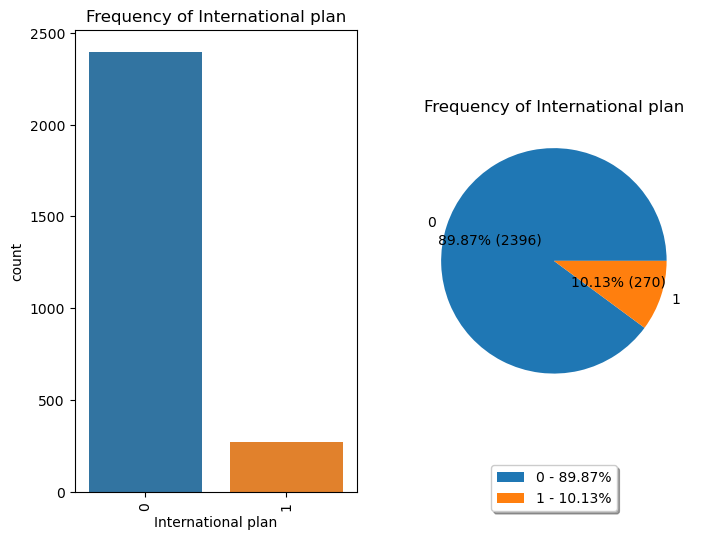

   Voice mail plan      Ratio
0             1933  72.505626
1              733  27.494374


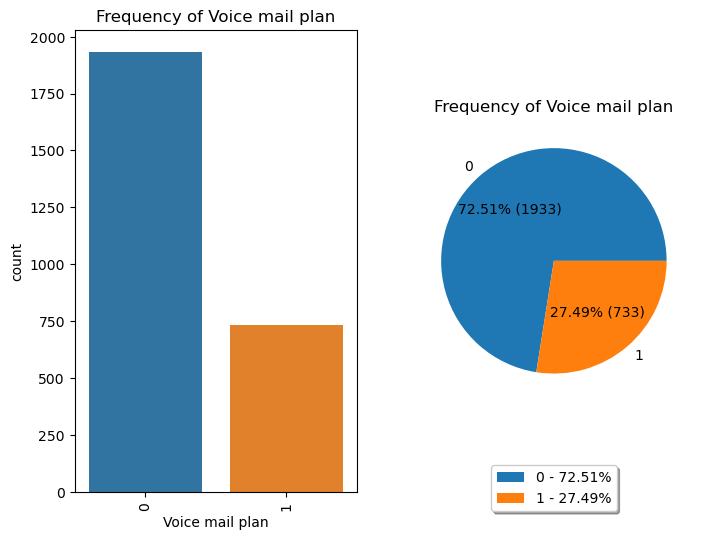

     Area code      Ratio
415       1318  49.437359
510        679  25.468867
408        669  25.093773


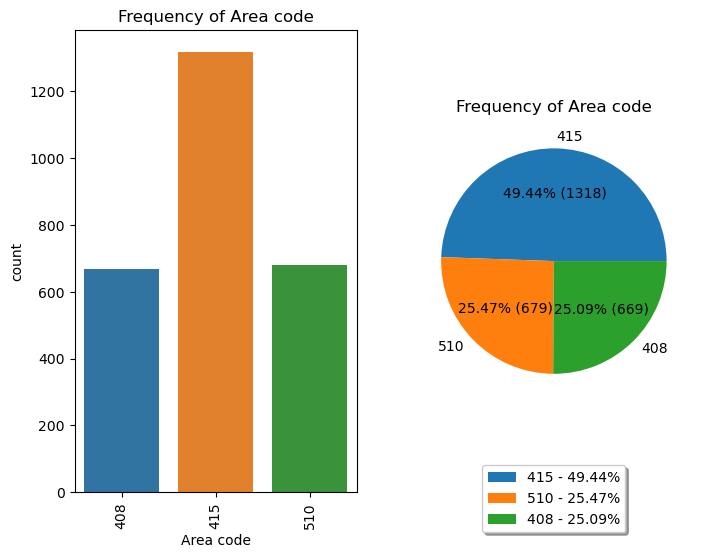

   Churn      Ratio
0   2278  85.446362
1    388  14.553638


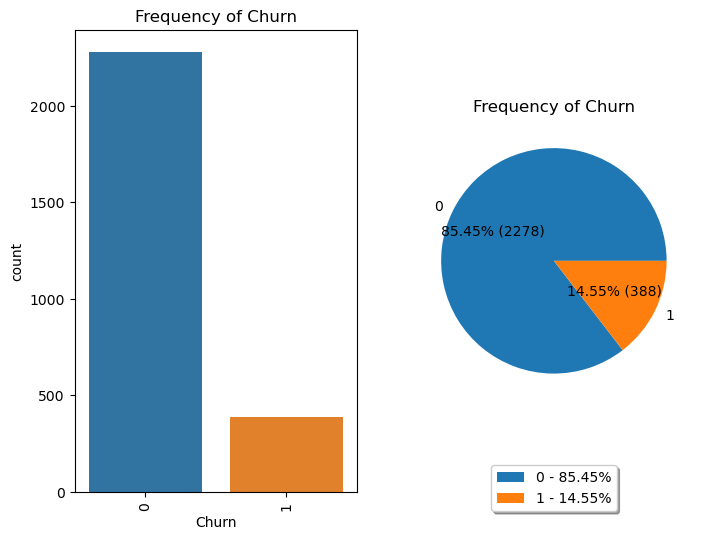

In [42]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

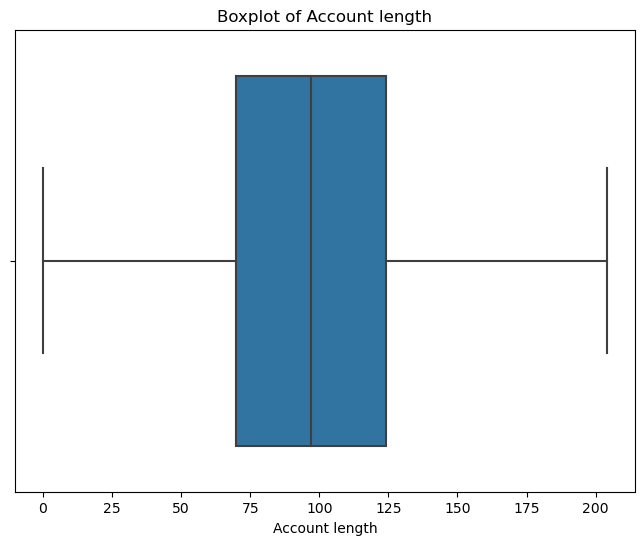

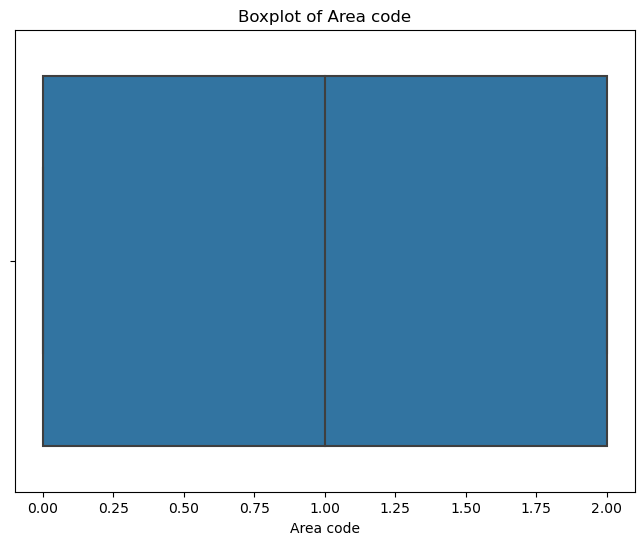

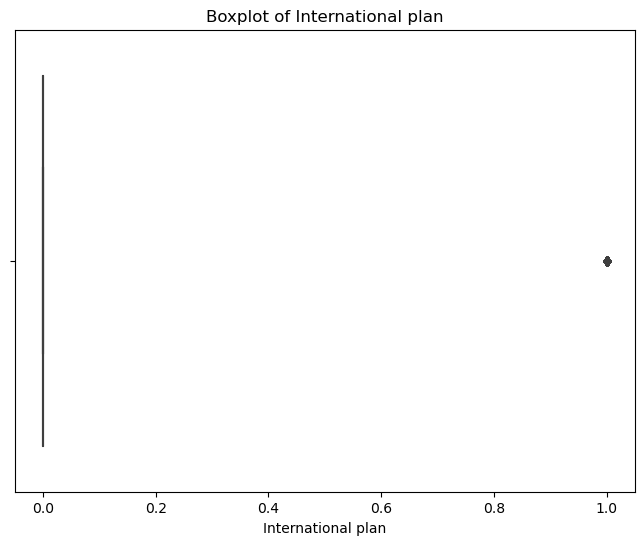

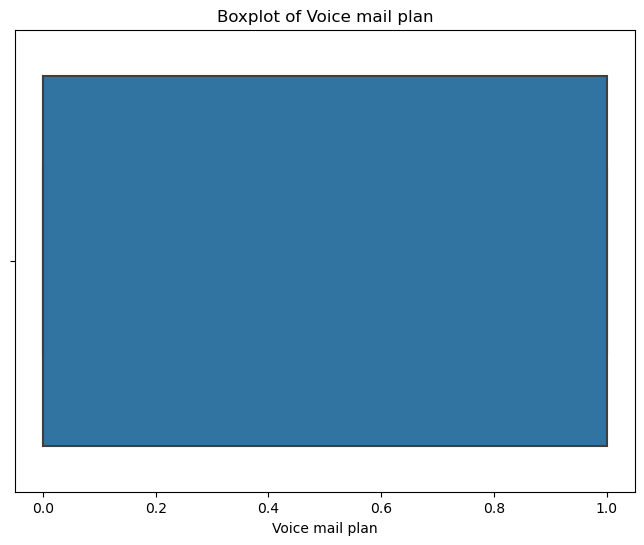

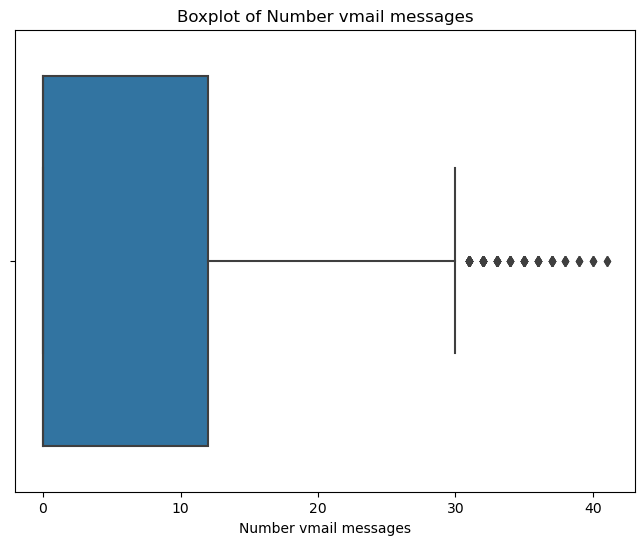

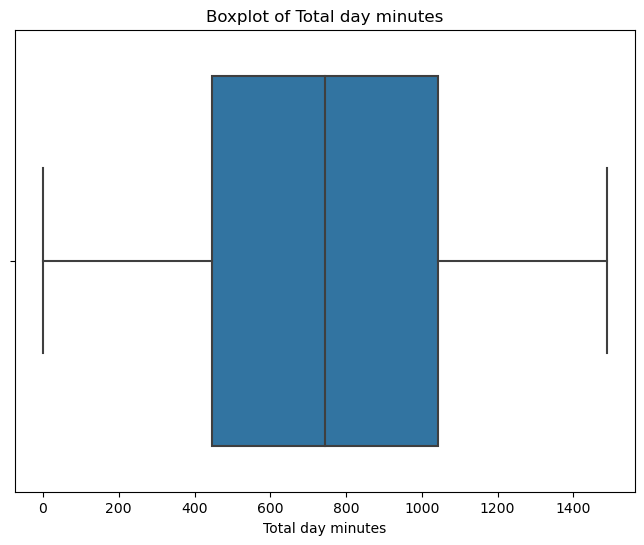

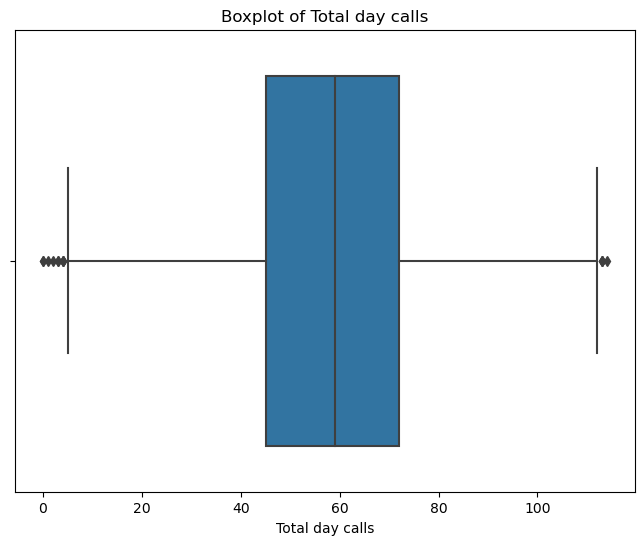

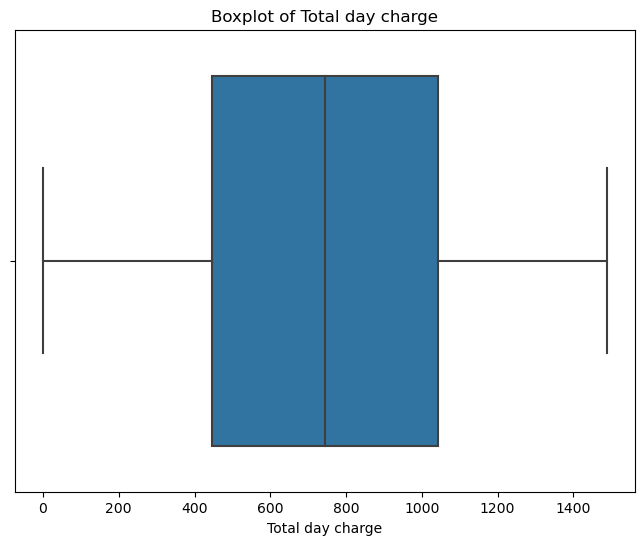

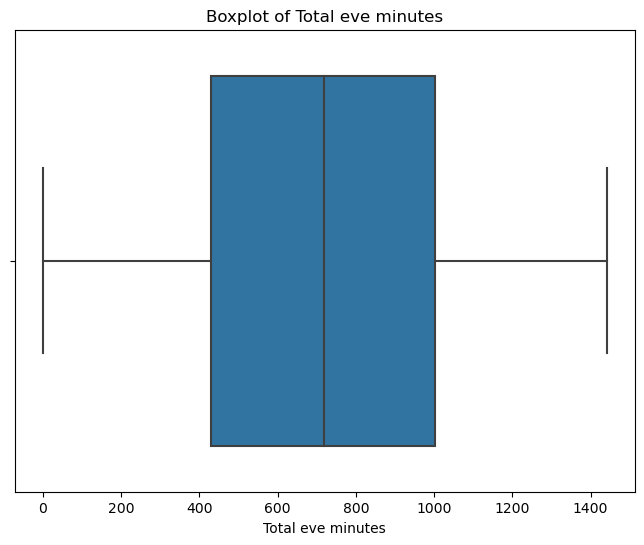

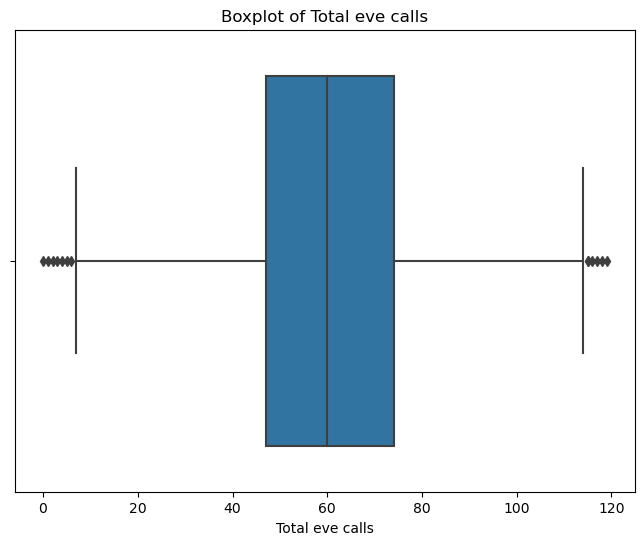

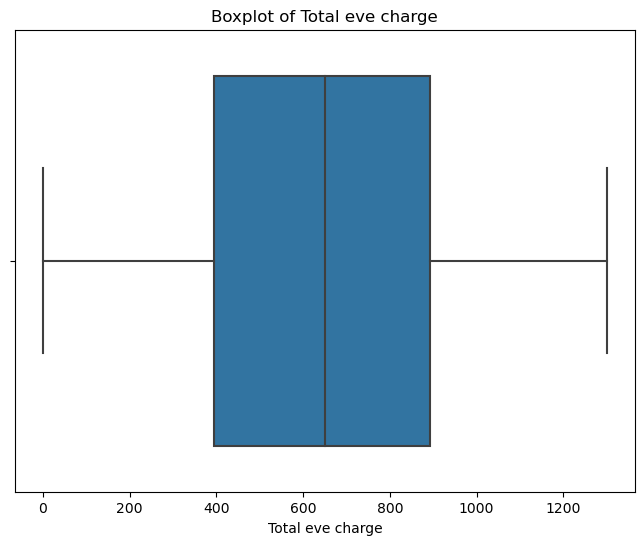

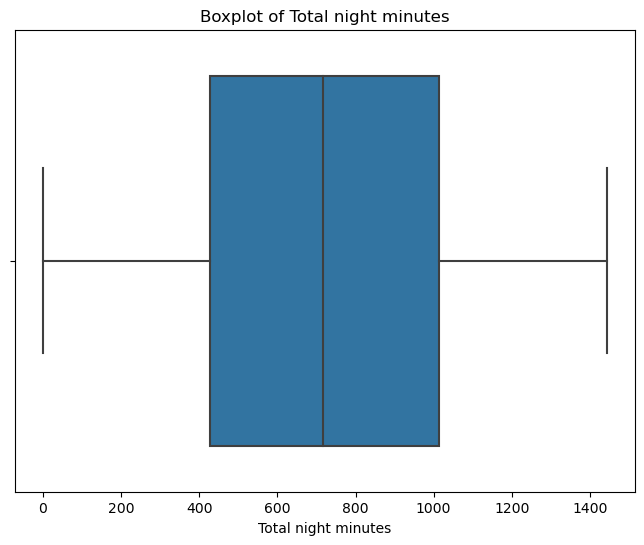

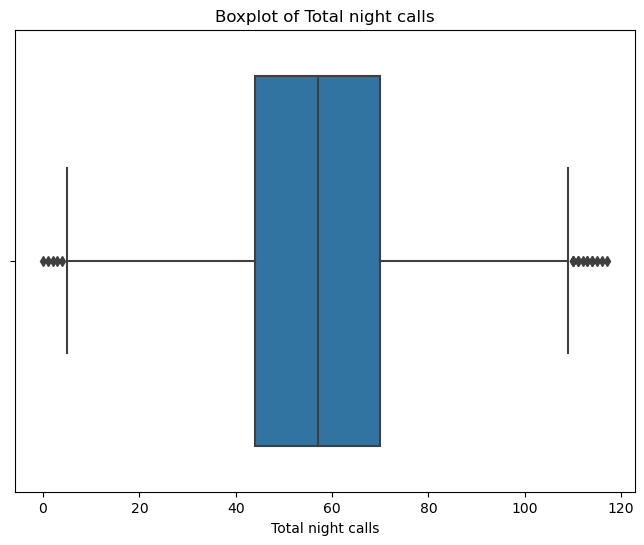

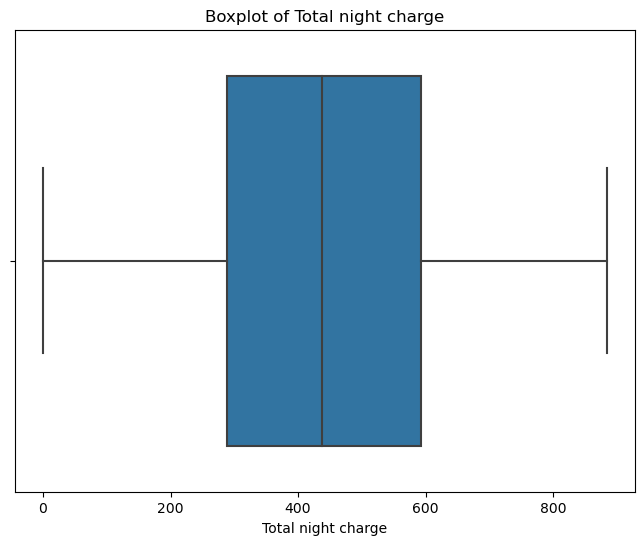

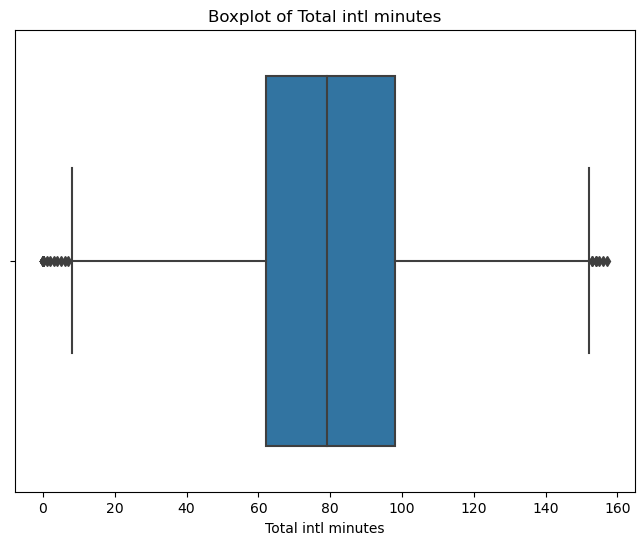

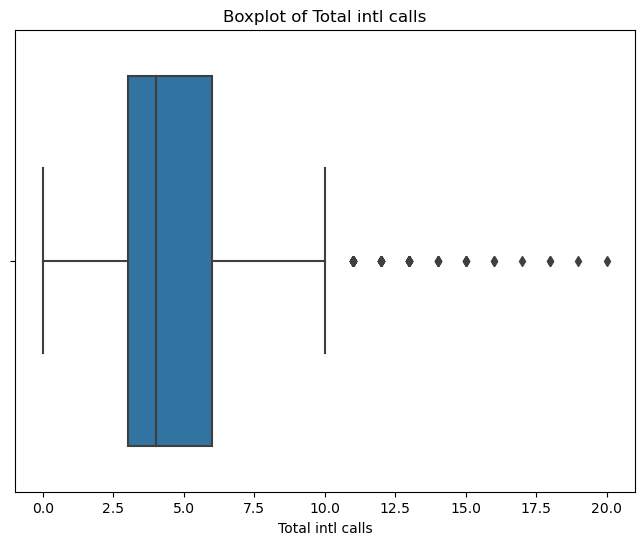

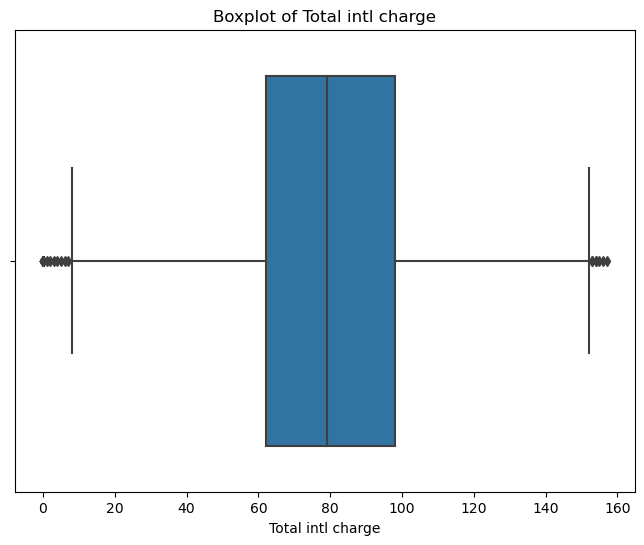

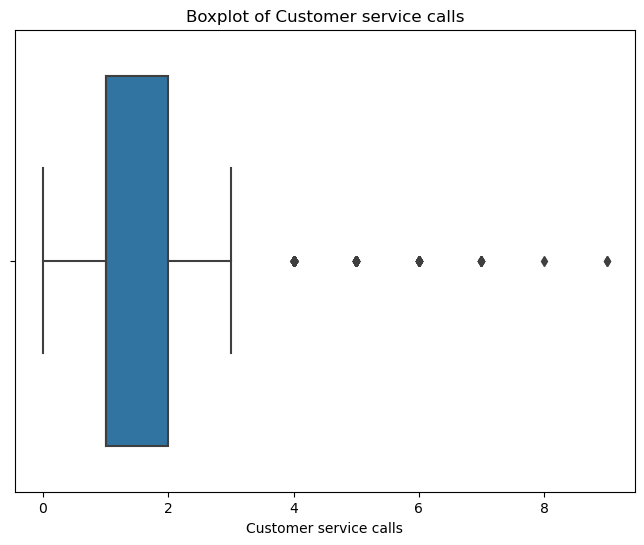

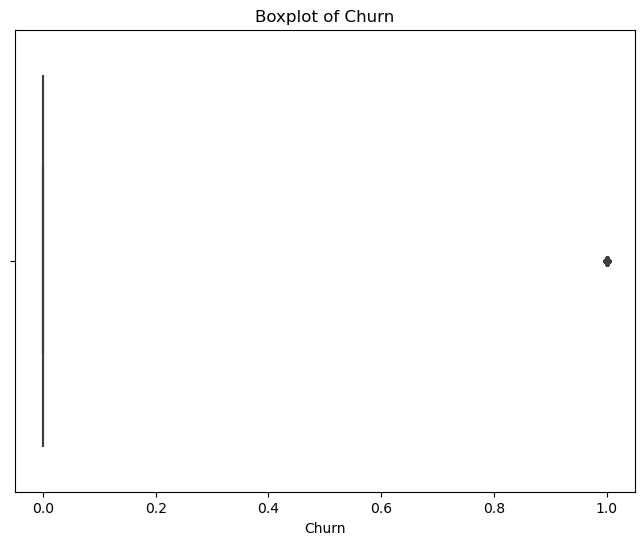

In [47]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

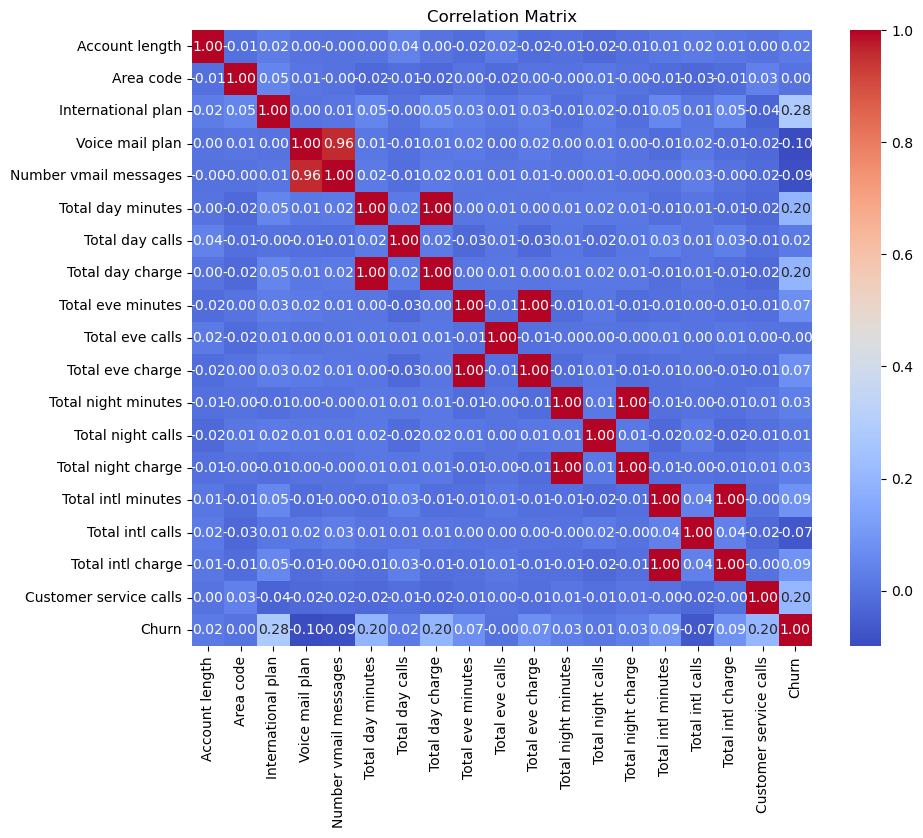

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Train Data Preparation for Model

In [51]:
x = df.drop(['State', 'Churn'], axis=1)
x.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,125,1,0,1,18,1355,68,1355,691,59,626,1080,48,628,77,3,77,1
1,104,1,0,1,19,595,81,595,673,63,611,1155,60,670,114,3,114,1
2,134,1,0,0,0,1244,72,1244,129,70,123,388,61,269,99,5,99,0
3,81,0,1,0,0,1456,29,1456,10,48,10,683,46,420,43,7,43,2
4,72,1,1,0,0,638,71,638,289,82,269,595,78,376,78,3,78,3


In [53]:
y = df['Churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [55]:
x_train = x
y_train = y

# Test Data Manipulation

In [57]:
test_data = pd.read_csv("churn-bigml-20.csv")
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [58]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(test_data)

Observations: 667
Variables: 20
cat_cols: 5
num_cols: 14
cat_but_car: 1
num_but_cat: 3


In [59]:
test_data['International plan'] = np.where(test_data['International plan'] == 'Yes', 1, 0)

test_data['Voice mail plan'] = np.where(test_data['Voice mail plan'] == 'Yes', 1, 0)
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [60]:
test_data['Churn'] = np.where(test_data['Churn'] == True, 1, 0)
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [71]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["Account length", "Area code", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]

for col in categorical_columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

print(test_data.head())

  State  Account length  Area code  International plan  Voice mail plan  \
0    LA             100          0                   0                0   
1    IN              48          1                   0                0   
2    NY             143          1                   0                0   
3    SC              94          1                   0                0   
4    HI              32          2                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0                303               47   
1                      0                104               87   
2                      0                560               17   
3                      0                 62               53   
4                      0                 83               67   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0               303                555               26               526   
1         

In [72]:
correlation_matrix = test_data.corr()
correlation_matrix

/var/folders/rc/pq_s43416_d88zrg50vt0g5m0000gn/T/ipykernel_2062/1643641175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = test_data.corr()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.044373,0.032497,0.008603,-0.017273,0.022086,0.036789,0.022086,0.030336,0.023899,0.029778,-0.027810,0.027291,-0.026697,0.005333,0.033243,0.005333,-0.027419,0.010269
Area code,-0.044373,1.000000,0.036539,0.001262,0.025342,0.060743,0.016156,0.060743,0.038442,0.007392,0.038341,0.008040,0.007315,0.008296,-0.018080,-0.003288,-0.018080,-0.003984,-0.005249
International plan,0.032497,0.036539,1.000000,0.024382,0.021504,0.061383,0.041508,0.061383,-0.009665,-0.009992,-0.009418,-0.111069,-0.011113,-0.111350,0.013286,0.045393,0.013286,0.025475,0.181634
Voice mail plan,0.008603,0.001262,0.024382,1.000000,0.903925,-0.061527,-0.023789,-0.061527,0.023000,-0.042218,0.023152,0.033846,0.020676,0.033441,0.049914,-0.021828,0.049914,-0.001355,-0.113465
Number vmail messages,-0.017273,0.025342,0.021504,0.903925,1.000000,-0.073543,0.001191,-0.073543,0.040209,-0.047152,0.040408,0.046696,-0.007381,0.046834,0.022358,-0.041939,0.022358,0.013753,-0.094103
Total day minutes,0.022086,0.060743,0.061383,-0.061527,-0.073543,1.000000,-0.024550,1.000000,0.003326,0.039490,0.003359,-0.039656,0.051507,-0.039280,-0.010280,0.008516,-0.010280,0.012549,0.206553
Total day calls,0.036789,0.016156,0.041508,-0.023789,0.001191,-0.024550,1.000000,-0.024550,-0.003846,0.001896,-0.004055,0.076420,-0.029319,0.076591,-0.014471,-0.006391,-0.014471,-0.050637,0.016348
Total day charge,0.022086,0.060743,0.061383,-0.061527,-0.073543,1.000000,-0.024550,1.000000,0.003326,0.039490,0.003359,-0.039656,0.051507,-0.039280,-0.010280,0.008516,-0.010280,0.012549,0.206553
Total eve minutes,0.030336,0.038442,-0.009665,0.023000,0.040209,0.003326,-0.003846,0.003326,1.000000,-0.016471,0.999936,-0.014450,-0.002098,-0.014529,-0.018547,0.014931,-0.018547,-0.012011,0.167017
Total eve calls,0.023899,0.007392,-0.009992,-0.042218,-0.047152,0.039490,0.001896,0.039490,-0.016471,1.000000,-0.017139,0.002380,0.038276,0.001704,0.003024,0.079531,0.003024,0.007677,0.050458


# Test Data Visualization

   International plan      Ratio
0                 614  92.053973
1                  53   7.946027


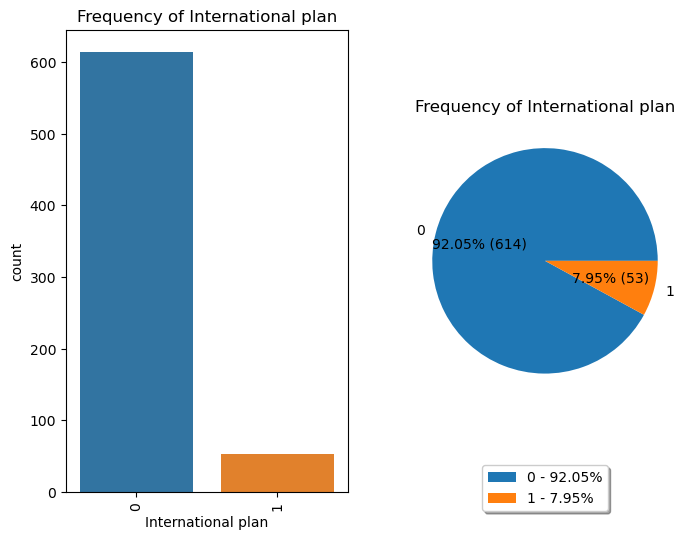

   Voice mail plan      Ratio
0              478  71.664168
1              189  28.335832


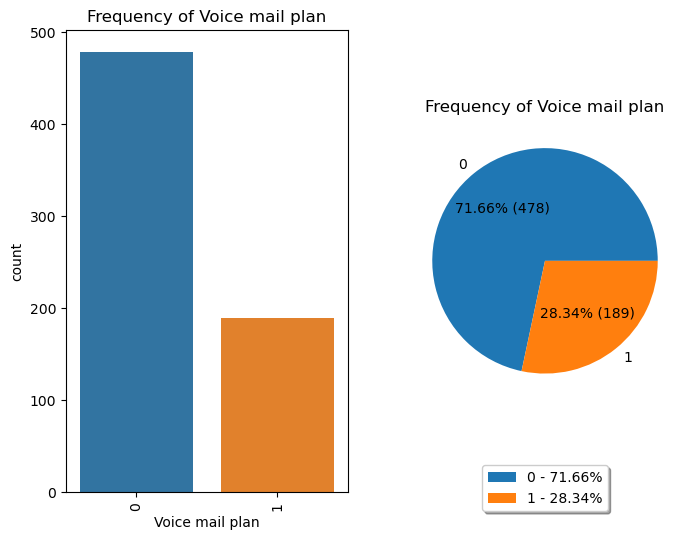

   Area code      Ratio
1        337  50.524738
0        169  25.337331
2        161  24.137931


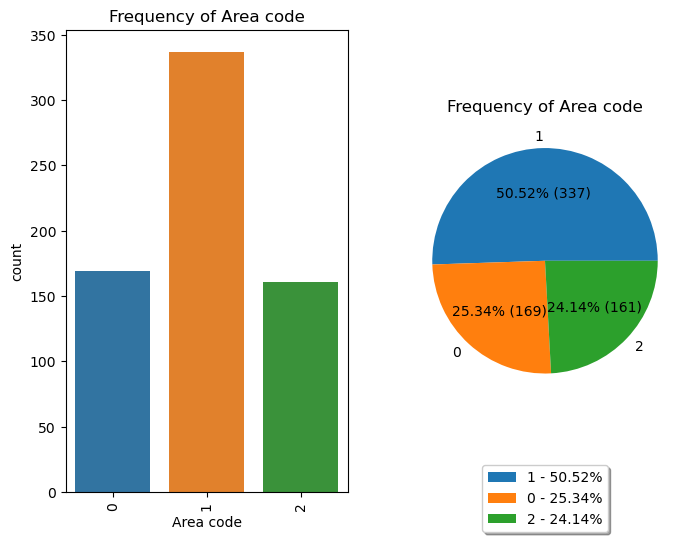

   Customer service calls      Ratio
1                     236  35.382309
2                     151  22.638681
0                     142  21.289355
3                      81  12.143928
4                      33   4.947526
5                      17   2.548726
6                       5   0.749625
8                       1   0.149925
7                       1   0.149925


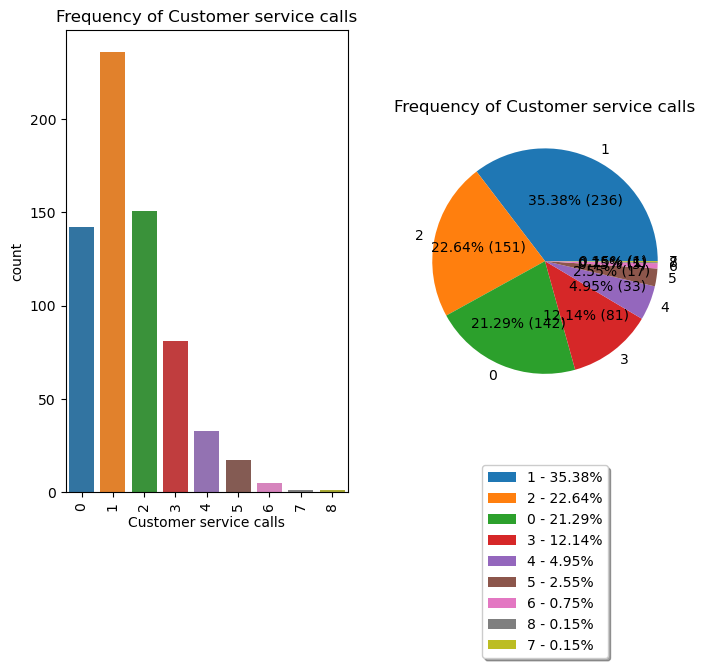

   Churn      Ratio
0    572  85.757121
1     95  14.242879


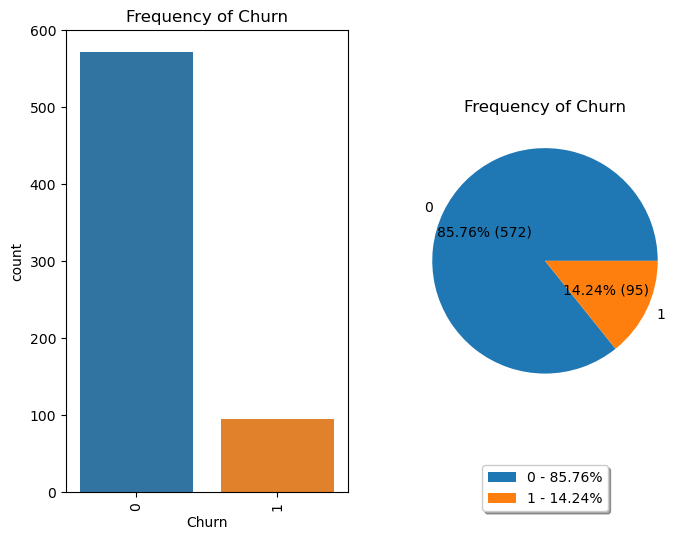

In [73]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(test_data, col, True)

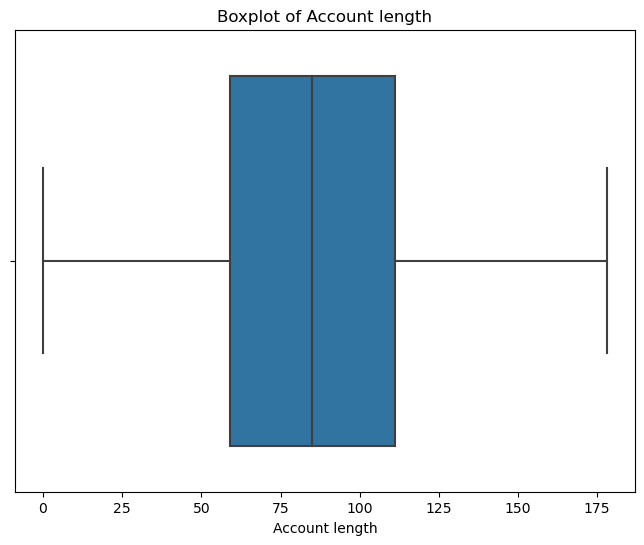

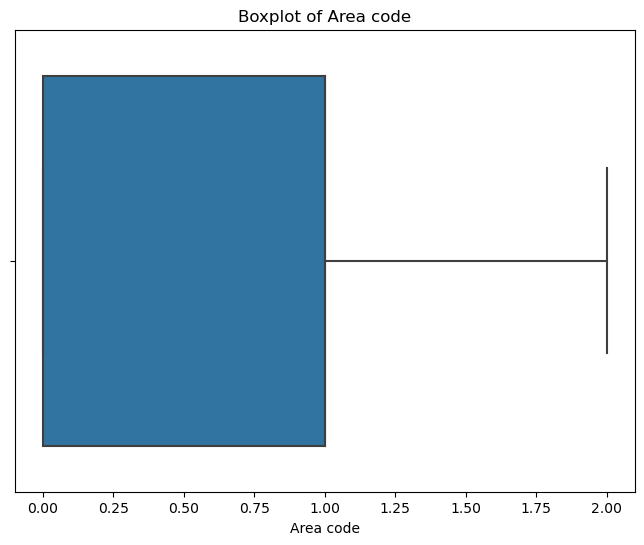

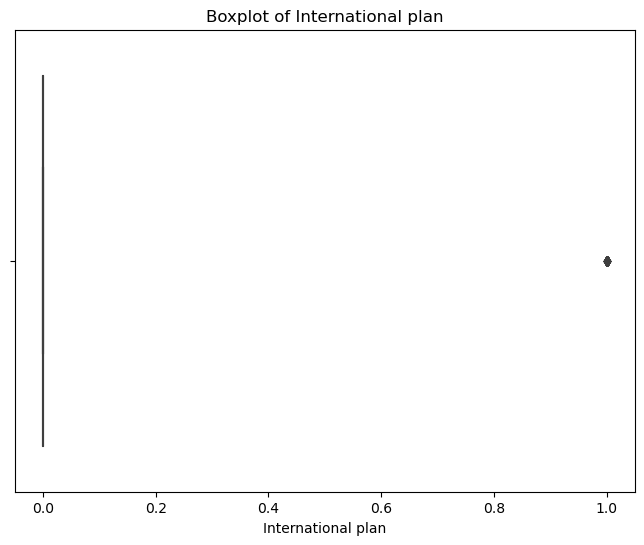

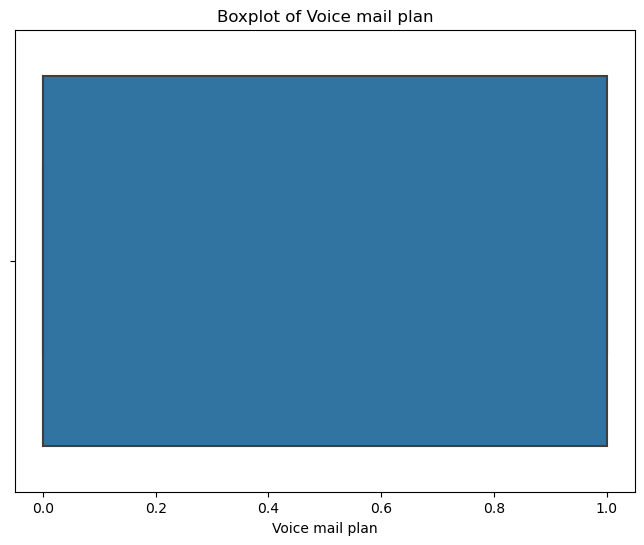

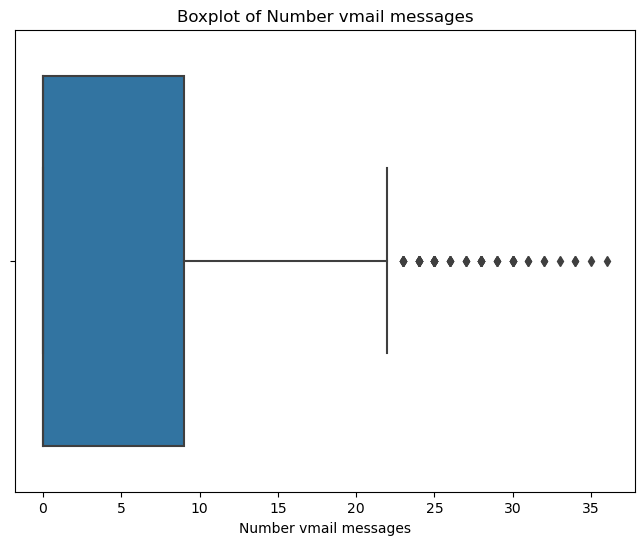

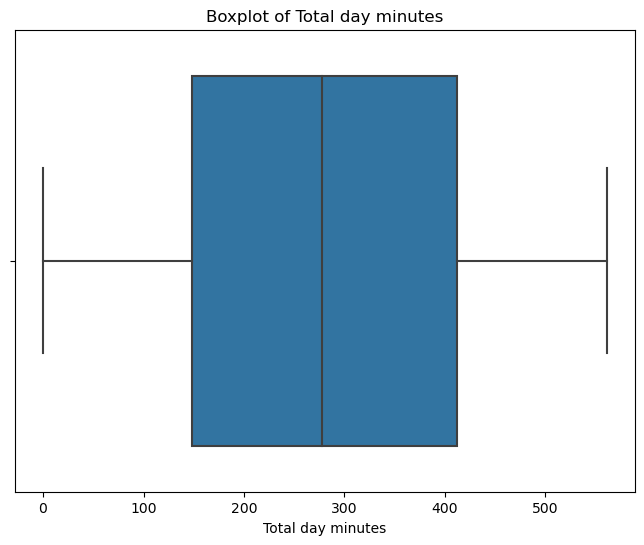

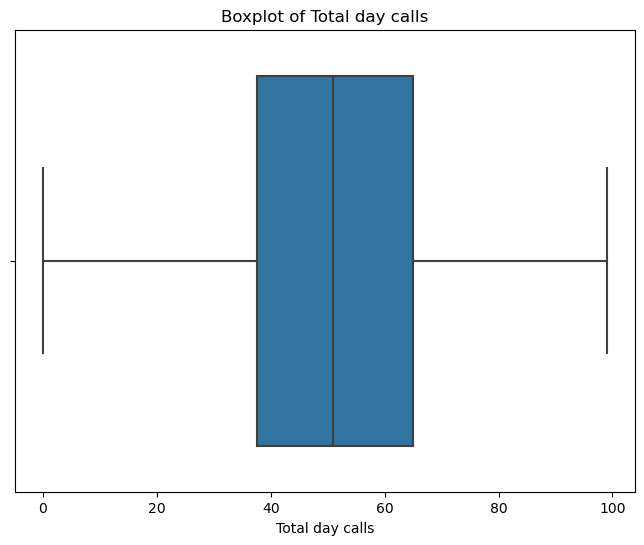

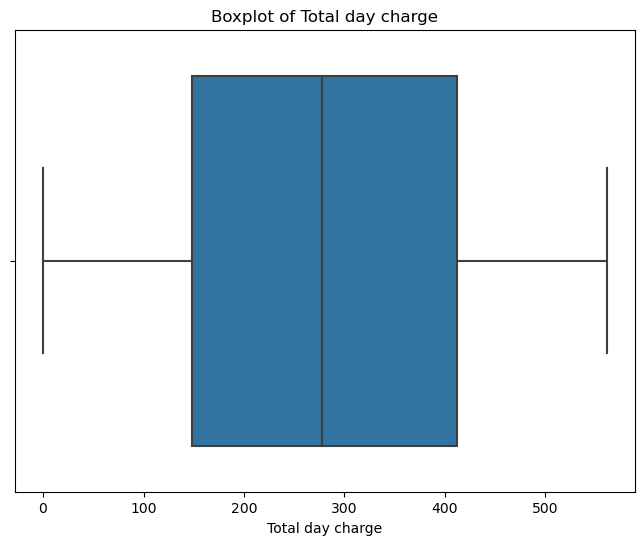

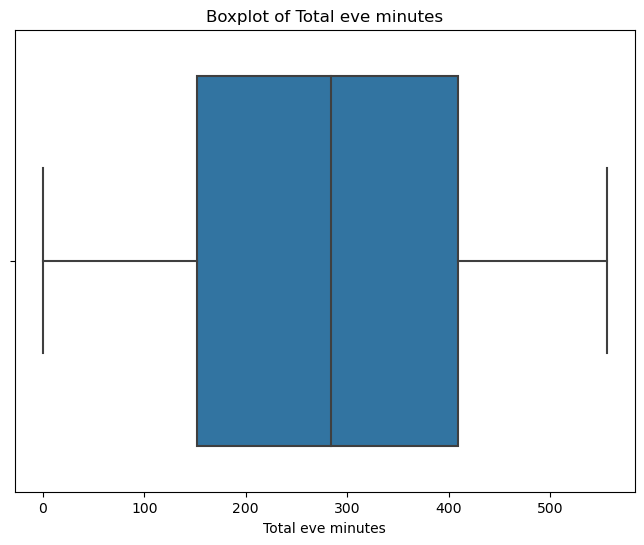

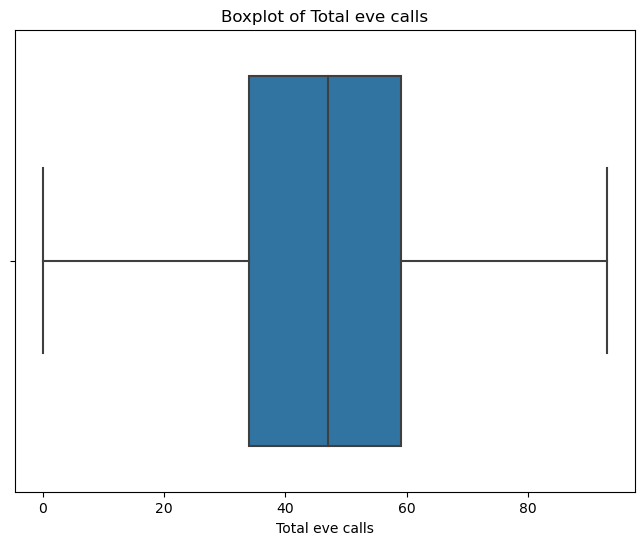

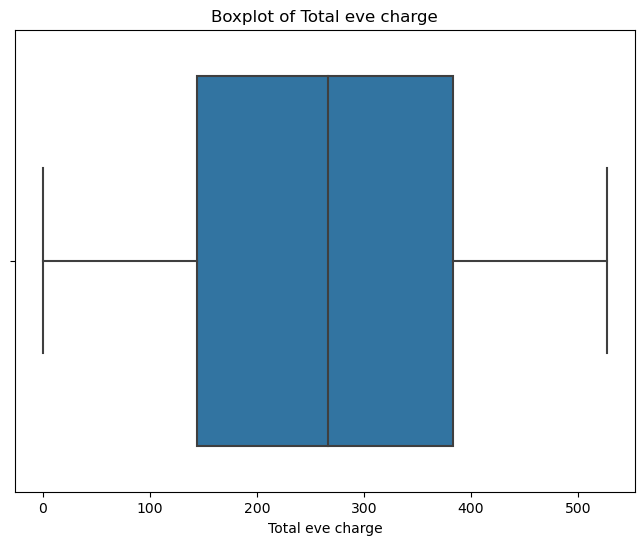

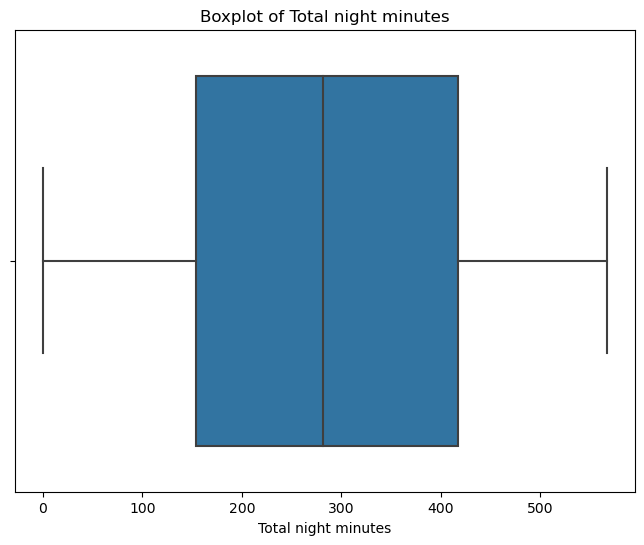

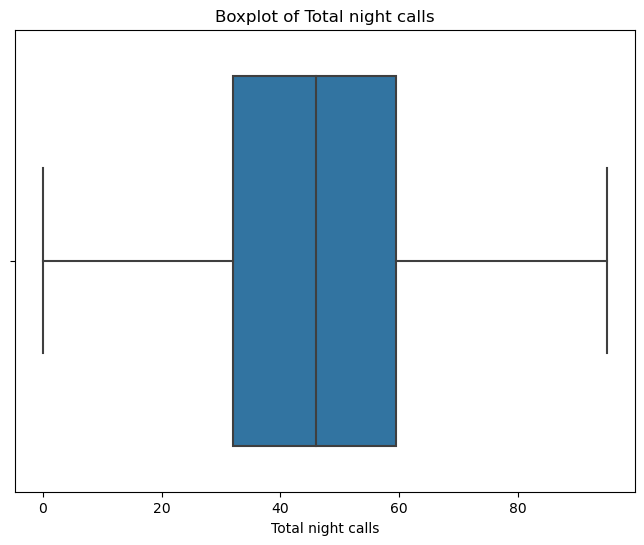

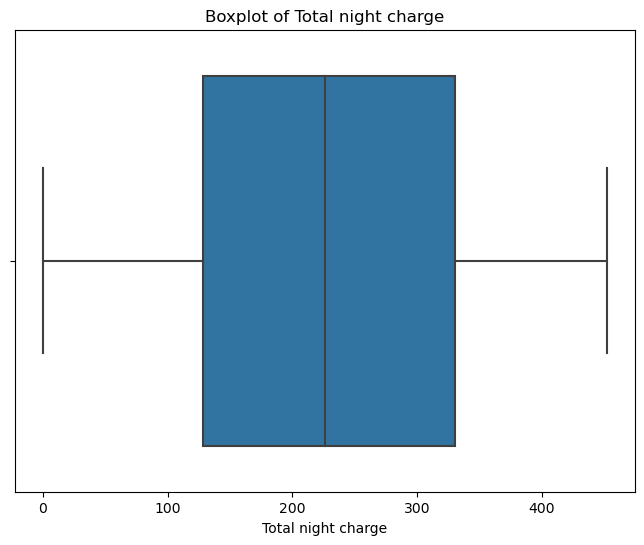

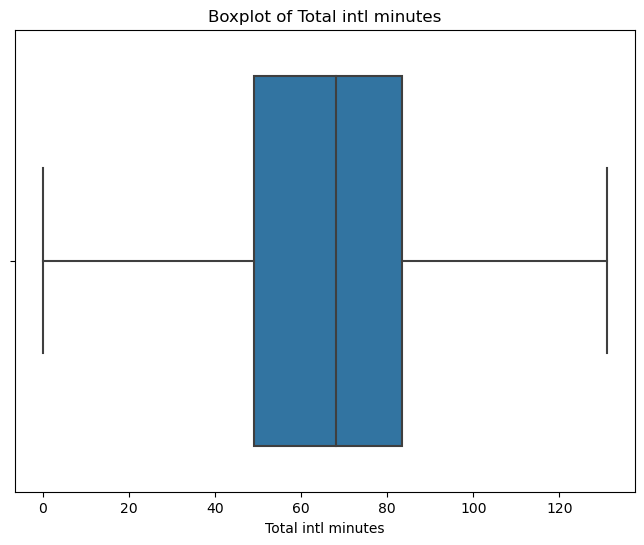

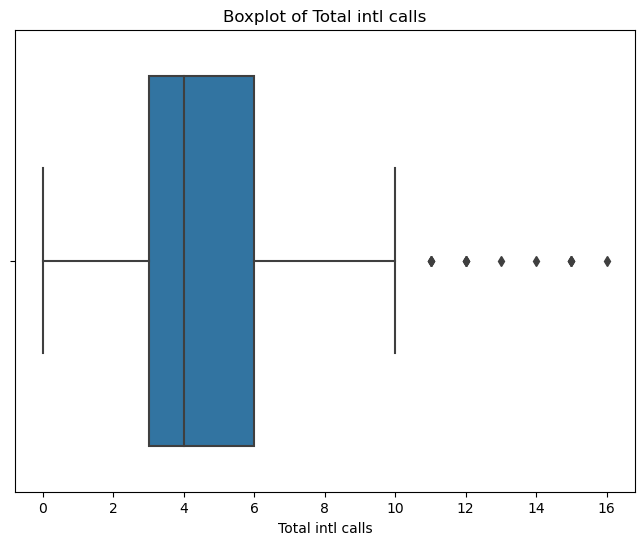

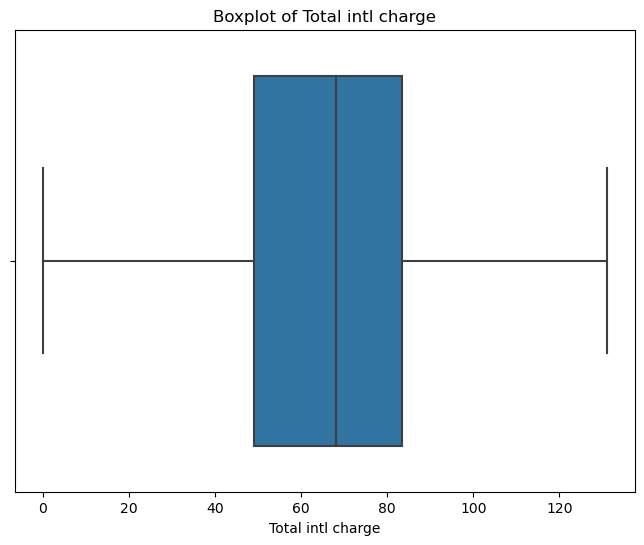

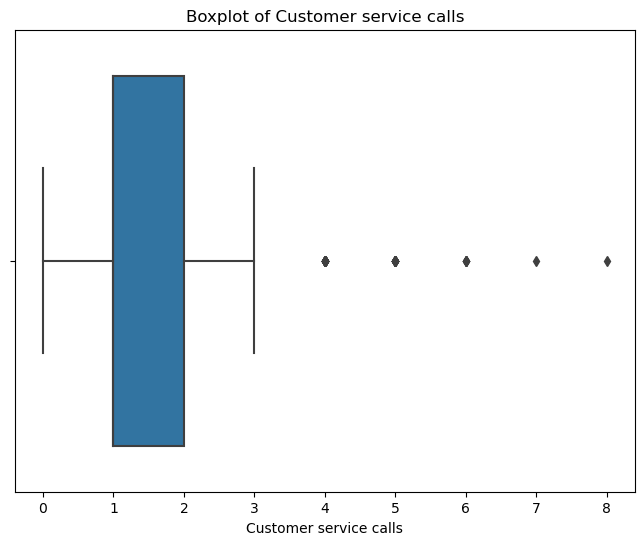

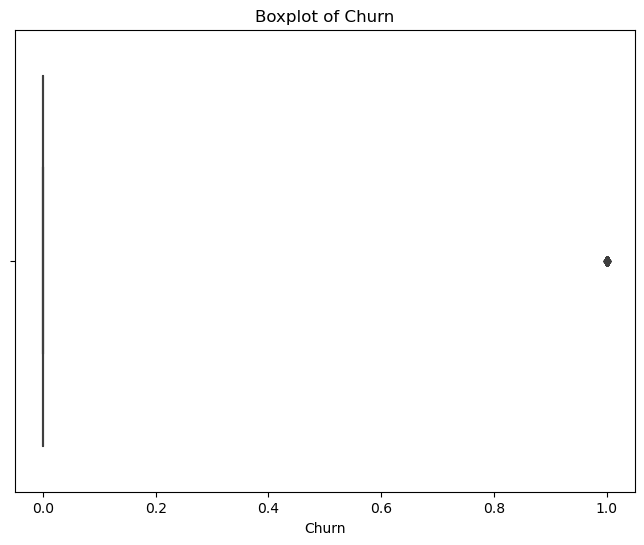

In [75]:
numerical_columns = test_data.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=test_data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

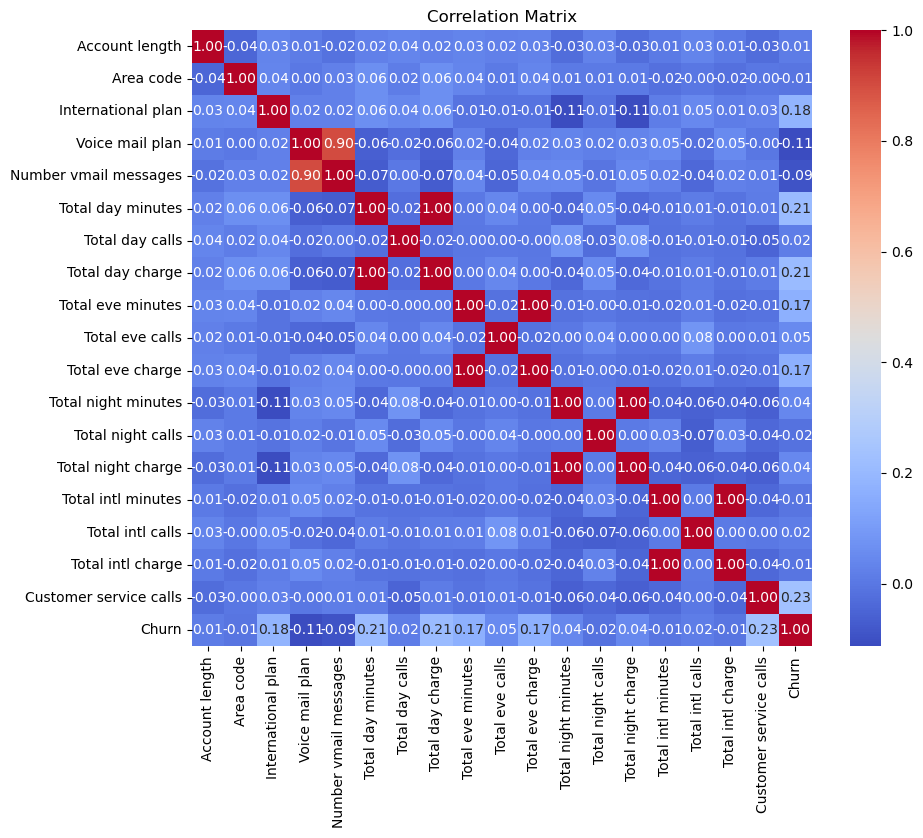

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Test Data Preparation for  Model

In [61]:
x_test = test_data.drop(['State', 'Churn'], axis=1)
x_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [62]:
y_test = test_data['Churn']
y_test.head()

0    0
1    1
2    1
3    0
4    0
Name: Churn, dtype: int64

# Model Building

In [54]:
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [63]:
#models
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)
gbc = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

In [66]:
#Training the models
log_reg.fit(x_train, y_train)
dtc.fit(x_train, y_train)
clf.fit(x_train, y_train)
gbc.fit(x_train, y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)
gnb.fit(x_train, y_train)

/Users/obanijesuadeyemo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [67]:
#predicting
log_reg_pred = log_reg.predict(x_test)
dtc_pred = dtc.predict(x_test)
clf_pred = clf.predict(x_test)
gbc_pred = gbc.predict(x_test)
svc_pred = svc.predict(x_test)
knn_pred = knn.predict(x_test)
gnb_pred = gnb.predict(x_test)

In [68]:
models = {
    'LogisticRegression': log_reg_pred,
    'DecisionTreeClassifier': dtc_pred,
    'RandomForestClassifier': clf_pred,
    'GradientBoostingClassifier': gbc_pred,
    'SVC': svc_pred,
    'KNeighborsClassifier': knn_pred,
    'GaussianNB': gnb_pred,
}

# Model Scoring

In [69]:
#Models performance
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print()

Model: LogisticRegression
Accuracy: 0.2324
Precision: 0.1508
Recall: 0.9474
F1 Score: 0.2601
Confusion Matrix:
 [[ 65 507]
 [  5  90]]

Model: DecisionTreeClassifier
Accuracy: 0.8576
Precision: 0.5000
Recall: 0.3474
F1 Score: 0.4099
Confusion Matrix:
 [[539  33]
 [ 62  33]]

Model: RandomForestClassifier
Accuracy: 0.8621
Precision: 0.5238
Recall: 0.3474
F1 Score: 0.4177
Confusion Matrix:
 [[542  30]
 [ 62  33]]

Model: GradientBoostingClassifier
Accuracy: 0.8621
Precision: 0.5238
Recall: 0.3474
F1 Score: 0.4177
Confusion Matrix:
 [[542  30]
 [ 62  33]]

Model: SVC
Accuracy: 0.8576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
 [[572   0]
 [ 95   0]]

Model: KNeighborsClassifier
Accuracy: 0.8576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
 [[572   0]
 [ 95   0]]

Model: GaussianNB
Accuracy: 0.8576
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
 [[572   0]
 [ 95   0]]



/Users/obanijesuadeyemo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/obanijesuadeyemo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/obanijesuadeyemo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
